In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools
from utils_svm_reviews import *

%matplotlib inline

In [7]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    distance = scipy.spatial.distance.cdist(X1,X2,'sqeuclidean')
    return np.exp(- 0.5 * distance / pow(sigma, 2))

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    return pow((offset + np.inner(X1, X2)), degree)


In [12]:
array = np.array([[-4, -1, 0, 2]]).T
linear_kernel(array, array)

array([[16,  4,  0, -8],
       [ 4,  1,  0, -2],
       [ 0,  0,  0,  0],
       [-8, -2,  0,  4]])

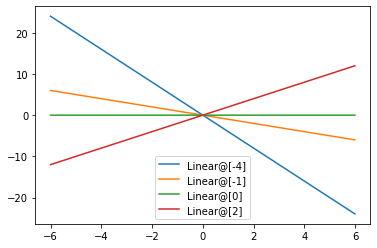

In [28]:
# PLot kernel machine functions

plot_step = .01
xpts = np.arange(-6, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 
 

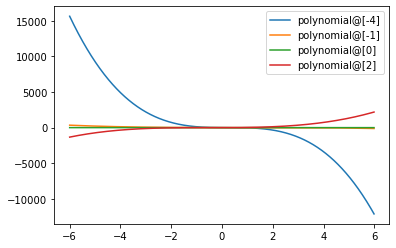

In [33]:
# polynomial
y = polynomial_kernel(prototypes, xpts, 1, 3) 
for i in range(len(prototypes)):
    label = "polynomial@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show()

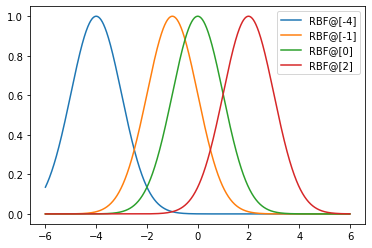

In [42]:
# RBF
y = RBF_kernel(prototypes, xpts, 1)
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show()

In [44]:
class Kernel_Machine(object):
    def __init__(self, kernel, training_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            training_points - an nxd matrix with rows x_1,..., x_n
            weights - a vector of length n with entries alpha_1,...,alpha_n
        """

        self.kernel = kernel
        self.training_points = training_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R alpha_i k(x_j, mu_i)
        """
        return self.kernel(X, self.training_points) @ self.weights
            

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

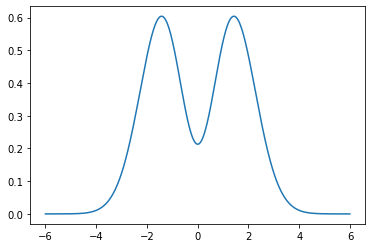

In [57]:
rbf_kernel = functools.partial(RBF_kernel, sigma=1)
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
k_machine = Kernel_Machine(rbf_kernel,
    np.array([-1, 0, 1]).reshape(-1, 1),
    np.array([1, -1, 1]).reshape(-1, 1))
plt.plot(xpts, k_machine.predict(xpts))
plt.show()

In [49]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

[]

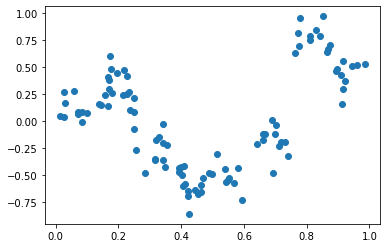

In [56]:
plt.scatter(x_train, y_train)
plt.plot()

In [66]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    alpha = np.linalg.inv(np.identity(X.shape[0])*l2reg + kernel(X, X)) @ y
    return Kernel_Machine(kernel, X, alpha)

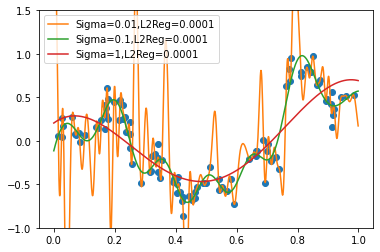

In [67]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

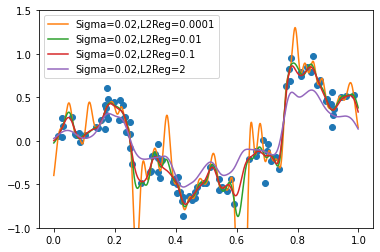

In [68]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

In [12]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [34]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [ ]:
param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False),
                    return_train_score=True
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

In [ ]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

In [69]:
# Can be a more convenient way to look at the table
import qgrid 
#qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
qgrid.show_grid(df_toshow)

In [ ]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= 1
degree = 1
l2reg = 1
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 1
l2reg= 1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

# Kernel SVM optional problem

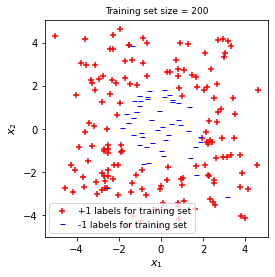

In [3]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

In [5]:
x_test.shape

(800, 2)

In [104]:
# 8
def train_soft_svm(X, y, k, x_test, y_test, lambda_reg=0.25, max_epoch=30):
    epoch = 0
    w = np.zeros(X.shape[1])
    t = 0
    order_list = range(len(X))
    
    # while epoch < max_epoch:
    for i in order_list:
        
        t += 1
        eta = 1 / (t * lambda_reg)

        # print('X[i]', X[i])
        # print('y[i]', y[i])
        # print('eta',eta)
        # print('w:', w)
        
        # print('判断：', y[i] * X[i] @ w)
        if y[i] * X[i] @ w < 1:
            w *= 1 - eta * lambda_reg
            w += eta * y[i] * X[i]
        else:
            w *= 1 - eta * lambda_reg
        # print('w:', w)
        print('test error', classification_error(w, x_test, y_test))
        # print('----')
    epoch += 1
    return w


In [105]:
def classification_error(w,X,y):
    sumError=0
    for i in range(len(X)):
        # print('ddudududu', y[i]*w.T@X[i])
        if y[i]*w.T@X[i]<1:
            sumError+=1
    frac=sumError/len(X)
    return frac

In [106]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k, x_test, y_test)

# #determine the decision regions for the predictions
# x1_min = min(x_test[:,0])
# x1_max= max(x_test[:,0])
# x2_min = min(x_test[:,1])
# x2_max= max(x_test[:,1])
# h=0.1
# xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
#                      np.arange(x2_min, x2_max, h))

# Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# #determine the predictions for the test set
# y_bar = f.predict (x_test) 
# yplus = np.ma.masked_where(y_bar<=0, y_bar)
# xplus = x_test[~np.array(yplus.mask)]
# yminus = np.ma.masked_where(y_bar>0, y_bar)
# xminus = x_test[~np.array(yminus.mask)]

# #plot the learned boundary and the predictions for the test set
# figsize = plt.figaspect(1)
# f, (ax) = plt.subplots(1, 1, figsize=figsize) 
# decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
# minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
# ax.set_ylabel(r"$x_2$", fontsize=11)
# ax.set_xlabel(r"$x_1$", fontsize=11)
# ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
# ax.axis('tight')
# ax.legend(handles=[pluses, minuses], fontsize=9)
# plt.show()

test error 0.52875
test error 0.56625
test error 0.5875
test error 0.61125
test error 0.54125
test error 0.54875
test error 0.5325
test error 0.54375
test error 0.5475
test error 0.58
test error 0.58875
test error 0.6025
test error 0.61625
test error 0.6275
test error 0.64
test error 0.64375
test error 0.87875
test error 0.6775
test error 0.60625
test error 0.74625
test error 0.76
test error 0.77125
test error 0.72
test error 0.72875
test error 0.72375
test error 0.64875
test error 0.8225
test error 0.84
test error 0.715
test error 0.6925
test error 0.83625
test error 0.7625
test error 0.6825
test error 0.655
test error 0.72
test error 0.69125
test error 0.7
test error 0.78375
test error 0.89125
test error 0.89875
test error 0.86375
test error 0.7675
test error 0.77375
test error 0.73375
test error 0.745
test error 0.90625
test error 0.73
test error 0.7375
test error 0.765
test error 0.76875
test error 0.77
test error 0.7775
test error 0.815
test error 0.7525
test error 0.825
test erro